# Scores for Weyn et al 2020

WeatherBench scores for https://www.essoar.org/doi/10.1002/essoar.10502543.1

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import xarray as xr
from src.regrid import *
from src.score import *

In [14]:
DATADIR = '/data/stephan/WeatherBench/5.625deg/'

In [4]:
z500_valid = load_test_data(f'{DATADIR}geopotential_500', 'z')
t850_valid = load_test_data(f'{DATADIR}temperature_850', 't')

## 1st file

In [7]:
ds_raw = xr.open_dataset('/data/stephan/Weyn/forecast_dlwp-cs_WeatherBench.nc')

In [8]:
ds_raw

<xarray.Dataset>
Dimensions:     (f_hour: 56, lat: 91, lon: 180, time: 418)
Coordinates:
  * lon         (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat         (lat) float64 89.01 87.03 85.05 83.08 ... -85.05 -87.03 -89.01
  * f_hour      (f_hour) float64 6.0 12.0 18.0 24.0 ... 318.0 324.0 330.0 336.0
  * time        (time) datetime64[ns] 2017-01-01 ... 2018-12-30T12:00:00
Data variables:
    z500        (f_hour, time, lat, lon) float32 ...
    tau300-700  (f_hour, time, lat, lon) float32 ...
    z1000       (f_hour, time, lat, lon) float32 ...
    t2m         (f_hour, time, lat, lon) float32 ...

In [9]:
ds = regrid(ds_raw, ddeg_out=5.625)

Create weight file: bilinear_91x180_32x64_peri.nc
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.


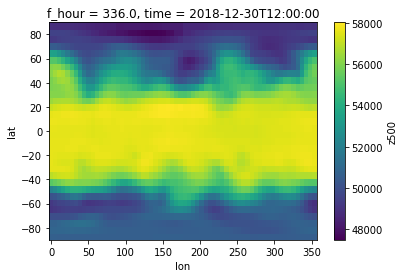

In [11]:
ds.z500.isel(f_hour=-1, time=-1).plot()

In [20]:
ds = ds.rename({'f_hour': 'lead_time'})

In [23]:
rmses = evaluate_iterative_forecast(ds.z500, z500_valid).compute()

In [27]:
rmses.sel(lead_time=[72, 120])

<xarray.DataArray 'rmse' (lead_time: 2)>
array([388.05496707, 623.93437454])
Coordinates:
    level      int32 500
  * lead_time  (lead_time) float64 72.0 120.0

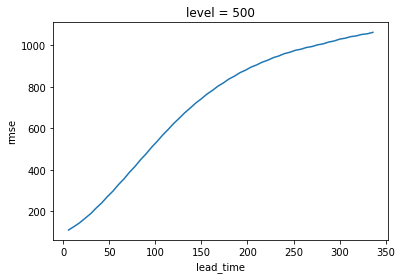

In [25]:
rmses.plot()

## 2nd File

In [5]:
ds_raw = xr.open_dataset('/data/stephan/Weyn/forecast_dlwp-cs-s2s_4var-t850_UNET2.1_WeatherBench.nc')

In [6]:
ds_raw

<xarray.Dataset>
Dimensions:     (f_hour: 56, lat: 91, lon: 180, time: 418)
Coordinates:
  * lon         (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat         (lat) float64 89.01 87.03 85.05 83.08 ... -85.05 -87.03 -89.01
  * f_hour      (f_hour) float64 6.0 12.0 18.0 24.0 ... 318.0 324.0 330.0 336.0
  * time        (time) datetime64[ns] 2017-01-01 ... 2018-12-30T12:00:00
Data variables:
    z500        (f_hour, time, lat, lon) float32 ...
    tau300-700  (f_hour, time, lat, lon) float32 ...
    z1000       (f_hour, time, lat, lon) float32 ...
    t2m0        (f_hour, time, lat, lon) float32 ...
    t850        (f_hour, time, lat, lon) float32 ...

In [7]:
ds = regrid(ds_raw, ddeg_out=5.625)

Reuse existing file: bilinear_91x180_32x64_peri.nc
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.


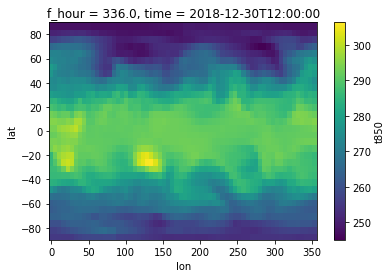

In [8]:
ds.t850.isel(f_hour=-1, time=-1).plot()

In [9]:
ds = ds.rename({'f_hour': 'lead_time'})

In [10]:
rmses = evaluate_iterative_forecast(ds.z500, z500_valid).compute()

In [12]:
rmses.lead_time.values

array([  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,  66.,
        72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126., 132.,
       138., 144., 150., 156., 162., 168., 174., 180., 186., 192., 198.,
       204., 210., 216., 222., 228., 234., 240., 246., 252., 258., 264.,
       270., 276., 282., 288., 294., 300., 306., 312., 318., 324., 330.,
       336.])

In [13]:
rmses.values

array([ 103.17063188,  122.10630367,  136.10243211,  159.60371898,
        178.83708591,  206.70160156,  229.36348603,  258.81130062,
        283.71891857,  314.78230398,  341.39132258,  373.37219594,
        401.58606025,  434.29952685,  463.15802549,  495.80006639,
        524.31388468,  555.66859751,  582.47058652,  611.33059846,
        635.65855631,  661.66887225,  683.22820212,  707.28077907,
        726.94251408,  748.87247504,  766.51542843,  786.40857263,
        802.06248032,  820.28514369,  834.91832605,  852.20249022,
        865.43747786,  881.59577428,  893.30422587,  907.57530058,
        917.48300651,  929.24543796,  937.19334574,  947.70628695,
        954.58220955,  964.02763426,  970.54550441,  980.02610941,
        986.14846482,  995.15838525, 1000.47042489, 1008.57077913,
       1013.20967844, 1020.09060853, 1023.76321382, 1030.14072867,
       1032.59675919, 1037.47101357, 1039.05914728, 1043.93011695])

In [14]:
rmses.sel(lead_time=[72, 120])

<xarray.DataArray 'rmse' (lead_time: 2)>
array([373.37219594, 611.33059846])
Coordinates:
    level      int32 500
  * lead_time  (lead_time) float64 72.0 120.0

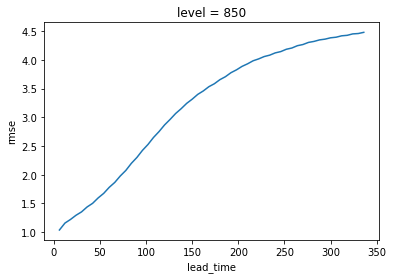

In [19]:
rmses.plot()

In [20]:
rmses = evaluate_iterative_forecast(ds.t850, t850_valid).compute()

In [21]:
rmses.values

array([1.03795918, 1.15878117, 1.22158419, 1.29490652, 1.35380706,
       1.43916452, 1.50264995, 1.59691888, 1.67583619, 1.78102905,
       1.86647818, 1.97919404, 2.07536937, 2.1990173 , 2.30110702,
       2.42429442, 2.52710765, 2.64945138, 2.75187673, 2.86765323,
       2.96385755, 3.06689935, 3.15067605, 3.24370726, 3.31685812,
       3.40008735, 3.4598297 , 3.53341098, 3.58535642, 3.65611831,
       3.70793333, 3.77767185, 3.82740362, 3.88753727, 3.93220208,
       3.98510661, 4.017722  , 4.05863569, 4.08302686, 4.12255695,
       4.14510952, 4.18557443, 4.20727425, 4.2476083 , 4.2679379 ,
       4.30476918, 4.32228166, 4.34863132, 4.36193909, 4.38523755,
       4.39565933, 4.41983848, 4.42832529, 4.45316435, 4.45961558,
       4.48041654])

In [22]:
rmses.sel(lead_time=[72, 120])

<xarray.DataArray 'rmse' (lead_time: 2)>
array([1.97919404, 2.86765323])
Coordinates:
    level      int32 850
  * lead_time  (lead_time) float64 72.0 120.0

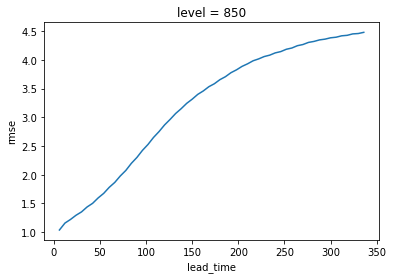

In [23]:
rmses.plot()